# SNOwGLoBES Tarfile Reader

Use the `tarfile` module to loop through the SNOwGLoBES files in a directory and push the data into an astropy table.

In [35]:
import tarfile
import numpy as np
from astropy.table import Table
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=14)

## Open Tarfile

In [43]:
tf = tarfile.open('../../Type Ia/DDT_NeutrinoFlux.tar.bz2')
# tf = tarfile.open('../../PISN/PISN_150Msun_EOS=Helm_NeutrinoFlux.tar.bz2')

### Read File List

Grab the list of files inside the archive using a list comprehension.

In [44]:
datafiles = sorted([f.name for f in tf if '.dat' in f.name])
datafiles

['30TimeBins/NuFluxN100v_TBin10_IH11.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH12.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH21.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH22.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH31.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH32.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH41.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH42.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH11.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH12.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH21.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH22.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH31.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH32.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH41.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH42.dat',
 '30TimeBins/NuFluxN100v_TBin10_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH11.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH12.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH21.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH22.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH31.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH32.dat',
 '30TimeBi

### No-oscillation Scenario

Extract the "NoOsc" files.

In [45]:
noosc = [df for df in datafiles if 'NoOsc' in df]
noosc.sort(key = len)
noosc

['30TimeBins/NuFluxN100v_TBin1_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin2_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin3_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin4_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin5_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin6_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin7_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin8_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin9_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin10_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin11_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin12_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin13_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin14_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin15_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin16_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin17_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin18_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin19_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin20_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin21_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin22_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin23_NoOsc.dat

### Extract Data

Loop through the "NoOsc" files and extract data into `astropy.Table` objects.

In [52]:
time = []
luminosity = {}
for nooscfile in noosc:
    with tf.extractfile(nooscfile) as f:
        meta = f.readline()
        metatext = meta.decode('utf-8')
        print(metatext)
        t = float(metatext.split('TBinMid=')[-1].split('sec')[0]) #* u.s
        dt = float(metatext.split('tBinWidth=')[-1].split('s')[0]) * u.s
        dE = float(metatext.split('eBinWidth=')[-1].split('MeV')[0]) * u.MeV
        data = Table.read(f, format='ascii.commented_header', header_start=-1)
        data.meta['t'] = t
        data.meta['dt'] = dt
        data.meta['dE'] = dE
        
        for flavor in ['NuE', 'NuMu', 'NuTau', 'aNuE', 'aNuMu', 'aNuTau']:
            n = np.trapz(data[flavor], data['E(GeV)'])
            
            if flavor in luminosity:
                luminosity[flavor].append(n)
            else:
                luminosity[flavor] = [n]

        time.append(t)
        print(t, dt, dE)
data

# N100v@TBinMid=0.0742746sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.0742746 0.04835 s 0.2 MeV
# N100v@TBinMid=0.122625sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.122625 0.04835 s 0.2 MeV
# N100v@TBinMid=0.170976sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.170976 0.04835 s 0.2 MeV
# N100v@TBinMid=0.219327sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.219327 0.04835 s 0.2 MeV
# N100v@TBinMid=0.267677sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.267677 0.04835 s 0.2 MeV
# N100v@TBinMid=0.316028sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.316028 0.04835 s 0.2 MeV
# N100v@TBinMid=0.364379sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.364379 0.04835 s 0.2 MeV
# N100v@TBinMid=0.412729sec@(tBinWidth=0.04835s)(eBinWidth=0

E(GeV),NuE,NuMu,NuTau,aNuE,aNuMu,aNuTau
float64,float64,float64,float64,float64,float64,float64
0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0002,328.38484,29.737499,29.737499,169.00186,31.870868,31.870868
0.0004,1312.9992,124.31584,124.31584,664.62408,130.30939,130.30939
0.0006,2607.5754,241.47274,241.47274,1220.6584,248.21057,248.21057
0.0008,3675.0468,327.69051,327.69051,1585.6183,331.88405,331.88405
0.001,4190.4091,355.81344,355.81344,1667.2057,356.55766,356.55766
0.0012,4214.6147,341.94962,341.94962,1568.7315,340.31867,340.31867
0.0014,3860.7331,296.4451,296.4451,1340.6014,293.67383,293.67383
0.0016,3338.0193,243.0904,243.0904,1088.9118,240.08854,240.08854


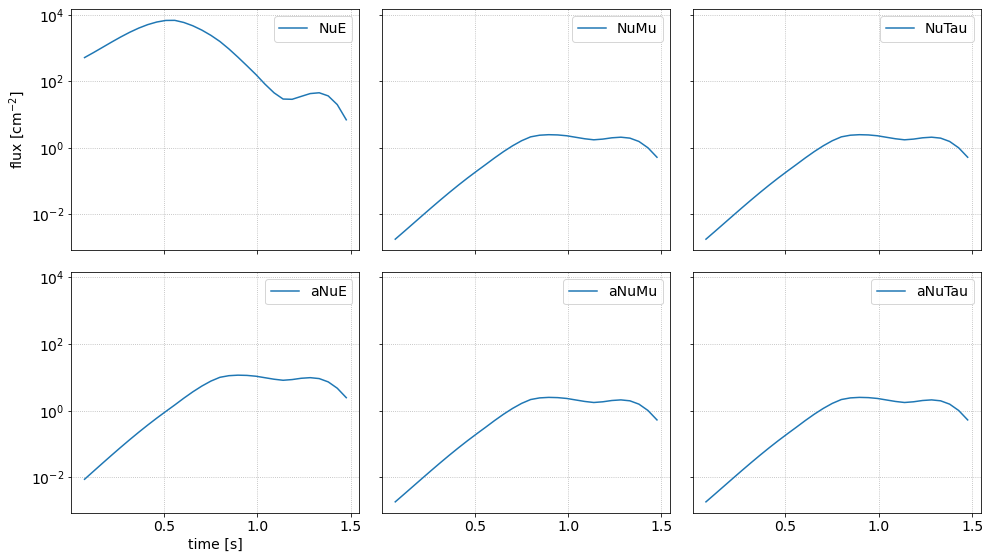

In [48]:
fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True, sharey=True)

for ax, (flavor, lum) in zip(axes.flatten(), luminosity.items()):
    ax.plot(time, lum, label=flavor)
    ax.legend()
    ax.grid(ls=':')
    
axes[0,0].set(yscale='log', ylabel='flux [cm$^{-2}$]')
axes[1,0].set(xlabel='time [s]')
fig.tight_layout()

1. Integrate each column w.r.t energy
1. Avg energy and E$^2$ to calculate $\alpha$